# Miscellaneous UETOOLS utilities
This chapter provides a showcase of useful utilities available via UETOOLS.

## TOC:
* [Case.hdf5tree](#hdf5tree)
* [Case.hdf5search](#hdf5search)
* [potent_1dsol](#potent_1dsol)
* [iterate_radtransp](#iterate_radtransp)
* [smooth_curve](#smooth_curve)
* [plot_driftdirection](#plot_driftdirection)

In [1]:
# Move to the folder containing the parameter scans
from os import chdir
from uetools import Case
chdir('testcase_lores')
c=Case("input.yaml")

UEDGE configuration file /Users/holm10/.uetoolsrc read.
UETOOLS-style save successfully restored from /Users/holm10/Documents/fusion/uedge/src/UETOOLS/jupyter/testcase_lores/nc20.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 1.54e+00




## Case.hdf5tree<a class="anchor" id="hdf5tree"></a>
When receiving any HDF5 file, it is useful to look at the data written to it. Case.hdf5tree is a useful tool for displaying the data in HDF5 files in a tree structure:

In [2]:
c.tools.hdf5tree("nc20.hdf5")

<HDF5 file "nc20.hdf5" (mode r)>
├── boundary
│   └── bbb
│       └── fniycbo (18, 8)
├── centered
│   ├── bbb
│   │   ├── ey (18, 10)
│   │   ├── ne (18, 10)
│   │   ├── ng (18, 10, 2)
│   │   ├── ni (18, 10, 8)
│   │   ├── phi (18, 10)
│   │   ├── prad (18, 10)
│   │   ├── pradcff (18, 10)
│   │   ├── pradhyd (18, 10)
│   │   ├── pradz (18, 10, 11, 1)
│   │   ├── psor (18, 10, 8)
│   │   ├── psorc (18, 10, 8)
│   │   ├── psorcxg (18, 10, 2)
│   │   ├── psorcxgc (18, 10, 2)
│   │   ├── psordis (18, 10)
│   │   ├── psorg (18, 10, 2)
│   │   ├── psorgc (18, 10, 2)
│   │   ├── psorrg (18, 10, 2)
│   │   ├── psorrgc (18, 10, 2)
│   │   ├── psorxr (18, 10, 8)
│   │   ├── psorxrc (18, 10, 8)
│   │   ├── rbfbt (18, 10)
│   │   ├── te (18, 10)
│   │   ├── tg (18, 10, 2)
│   │   └── ti (18, 10)
│   └── com
│       ├── xcs (18)
│       └── yyc (10)
├── constants
│   └── bbb
│       └── ev (float)
├── diffusivities
│   └── bbb
│       ├── dif_use (18, 10, 8)
│       ├── difni (31)
│       ├── di

The output can be truncated to some arbitrary depth to better get an overview of the data stored in the file:

In [3]:
c.tools.hdf5tree("nc20.hdf5", depth=1)

<HDF5 file "nc20.hdf5" (mode r)>
├── boundary
├── centered
├── constants
├── diffusivities
├── grid
├── postprocessed
├── restore
├── setup
├── species
└── staggered


The data in Groups in the file can also be displayed individually:

In [4]:
c.tools.hdf5tree("nc20.hdf5", group="setup/atoms")

<HDF5 file "nc20.hdf5" (mode r)>
setup/atoms
├── cfnidh (float)
├── ineudif (int)
├── isngon (6)
├── isupgon (6)
└── ziin (31)


## Case.hdf5search<a class="anchor" id="hdf5search"></a>
When you need to access a single variable from an HDF5 file, the function Case.hdf5search can be used. The function will traverse the file to the bottom, looking for a variable name and returning the data if found, or None if the variable is not present:

In [5]:
print("casename:", c.tools.hdf5search("nc20.hdf5","casename"))
print("ziin:", c.tools.hdf5search("nc20.hdf5","ziin"))
print("foo:", c.tools.hdf5search("nc20.hdf5","foo"))

casename: b'testcase'
ziin: [1. 0. 1. 2. 3. 4. 5. 6. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]
foo: None


## Case.potent_1dsol<a class="anchor" id="potent_1dsol"></a>
Turning on the potential equation in a single-null simulation can be hard without a reasonable initial guess (because of this, the potential equation should be turned on as soon as possible and not turned off). The Case.potent_1dsol will write an as-good-as-possible initial guess for the potential by 1D flux-tube evaluation to its state-variable, based on the current UEDGE state:

In [6]:
c.utils.potent_1dsol()

## Case.iterate_radtransp<a class="anchor" id="iterate_radtransp"></a>
Case.iterate_radtransp is a preliminary Python implementation of [SOLPSxport](https://github.com/ORNL-Fusion/SOLPSxport) for UEDGE, using a gradient-driven iterative method to fit the upstream profiles to provided upstream fitted profiles. The function uses a number of time-dependent runs to iterate a best fit to the fitted profiles. Calls Case.step_radtransp. The current implementation assumes the ion heat diffusivity coefficients to be equal to the electron heat diffusivity coefficients, and applies the same same transport coefficients to impurity species as to the hydrogenic ions.

In [7]:
#help(c.radtransp.iterate)

AttributeError: 'Case' object has no attribute 'radtransp'

- savefname: string of name of save files that are written
- psite: normalized Psi-values of the fitted temperature profile
- teexp: y-values of fitted temperature profile
- psine: normalized Psi-values of the fitted density profile
- neexp: y-values of fitted density profile
- sibdrys: Psi at X-point (read from grid if None)
- simagxs: Psi at magnetic axis (read from grid if None)
- iters: number of updates to the transport coefficients (each update is a time-dependent run)
- steps: how many of the iterations use incremental changes to the transport coefficients
    - Used to reduce fluctuations and avoid periadically varying solutions
    - The first "steps" number of iterations use linearly interpolated transport coefficients according to linspace(1/steps,1,steps)

## Case.smooth_curve<a class="anchor" id="smooth_curve"></a>
After automatically iterating the diffusion coefficients, the resulting curves may not be smooth, which translates to the data. Case.smooth_curve can be used to smooth noisy data:

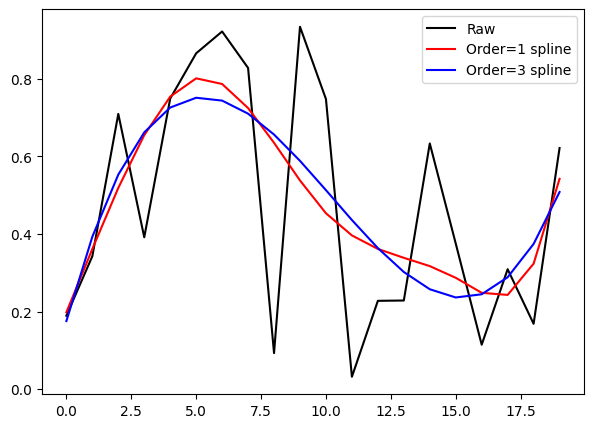

In [11]:
from random import random
y = [random() for x in range(20)]
c.plot.xy(range(20), y, True, linestyle='-', color='k', label='Raw');
c.plot.xy(*c.tools.smooth_curve(range(20),y,s=1),linestyle='-', color='r', label='Order=1 spline');
c.plot.xy(*c.tools.smooth_curve(range(20),y,s=3),linestyle='-', color='b', label='Order=3 spline');
c.plot.dumpfig.get_axes()[0].legend();

Case.smooth_curve returns a tuple containing the original x-values and smoothed y-values, (x, y_smooth). The kwarg "s" defines the order of the spline smoothing applied.

## Case.plot_driftdirection<a class="anchor" id="plot_driftdirection"></a>
Case.plot_driftdirection can be used to plot the direction of the ion $\mathbf{B}\cdot\nabla B$ drift direction if they were to be turned on:

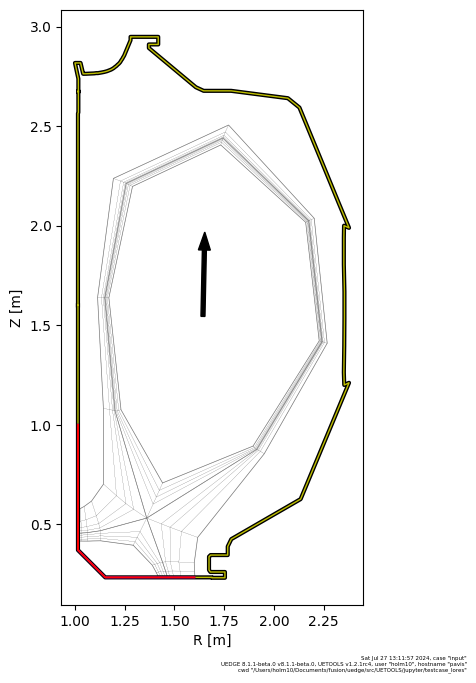

In [10]:
c.plot.iongradB();